# Task 1: EDA and Business Insights

## importing the basics libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the CSV files

In [13]:

products_df = pd.read_csv('Products.csv')
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Basic data exploration

In [14]:

def explore_dataset(df, name):
    print(f"\n{name} Dataset Info:")
    print(f"Shape: {df.shape}")
    print("\nSample data:")
    print(df.head())
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values:")
    print(df.isnull().sum())

# Explore each dataset

In [15]:

explore_dataset(products_df, "Products")
explore_dataset(customers_df, "Customers")
explore_dataset(transactions_df, "Transactions")


Products Dataset Info:
Shape: (100, 4)

Sample data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Data types:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Missing values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Customers Dataset Info:
Shape: (200, 4)

Sample data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura

# Convert date columns to datetime

In [16]:

transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Analysis 1: Sales by Category

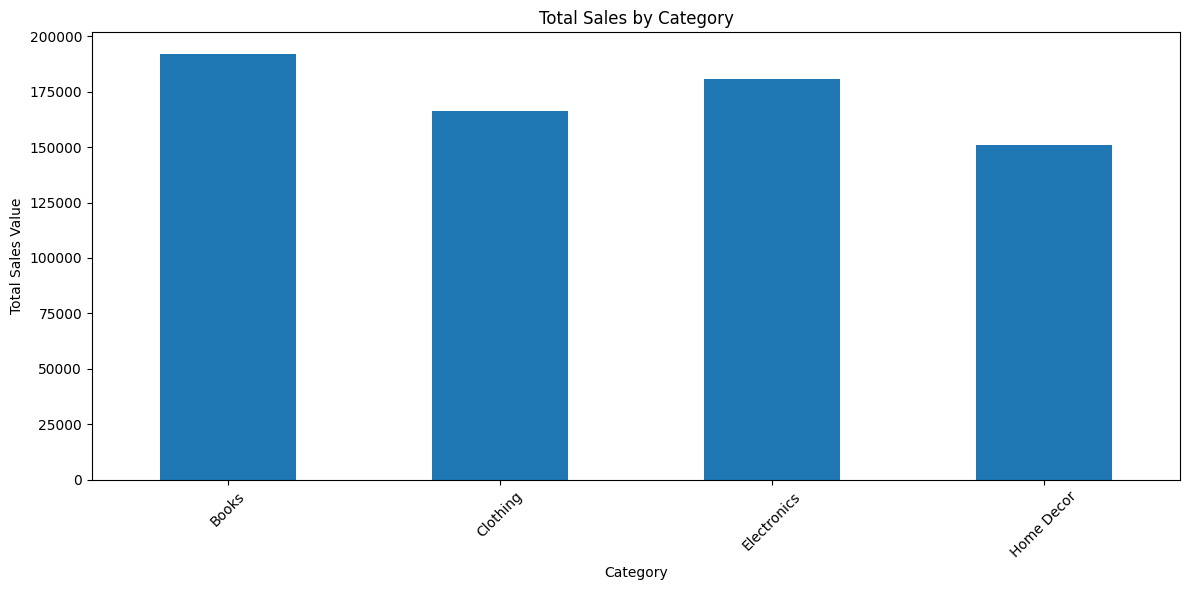

In [17]:
product_sales = pd.merge(transactions_df, products_df, on='ProductID')
category_sales = product_sales.groupby('Category').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).round(2)

plt.figure(figsize=(12, 6))
category_sales['TotalValue'].plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis 2: Customer Distribution by Region

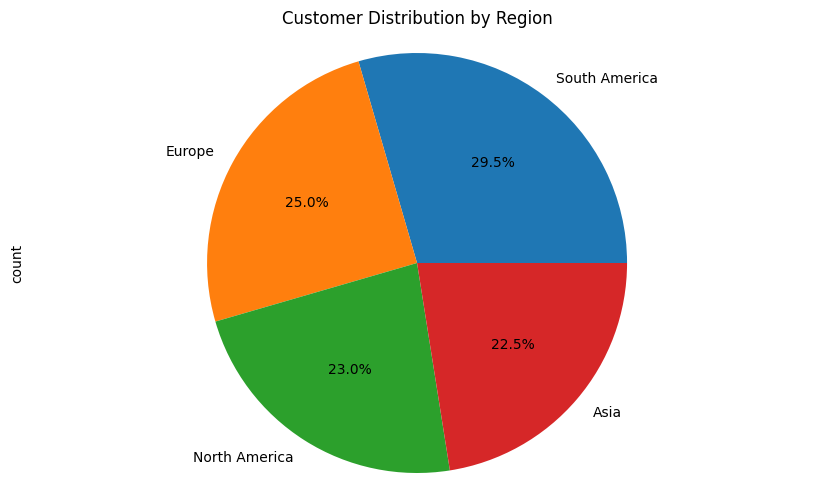

In [18]:
plt.figure(figsize=(10, 6))
customers_df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Distribution by Region')
plt.axis('equal')
plt.show()

# Analysis 3: Monthly Sales Trend

<Figure size 1500x600 with 0 Axes>

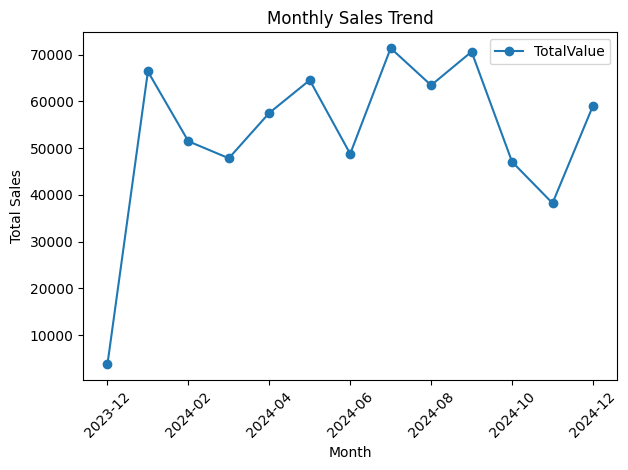

In [19]:
monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.strftime('%Y-%m'))[['TotalValue']].sum()
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis 4: Top 10 Products by Sales

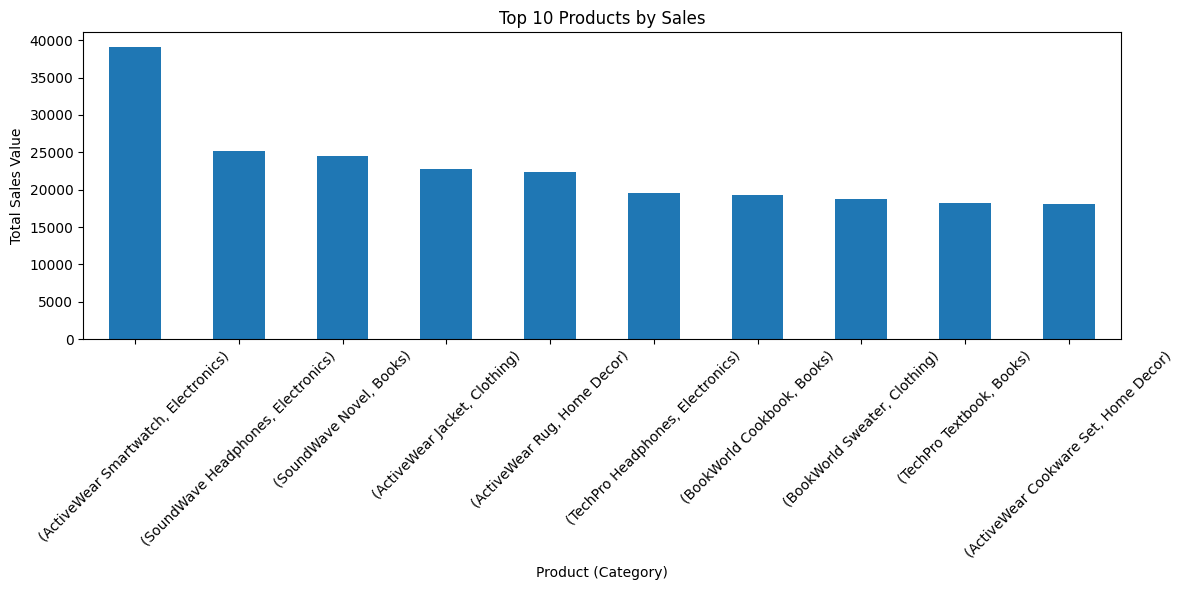

In [20]:
top_products = product_sales.groupby(['ProductName', 'Category'])['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product (Category)')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis 5: Average Order Value by Region

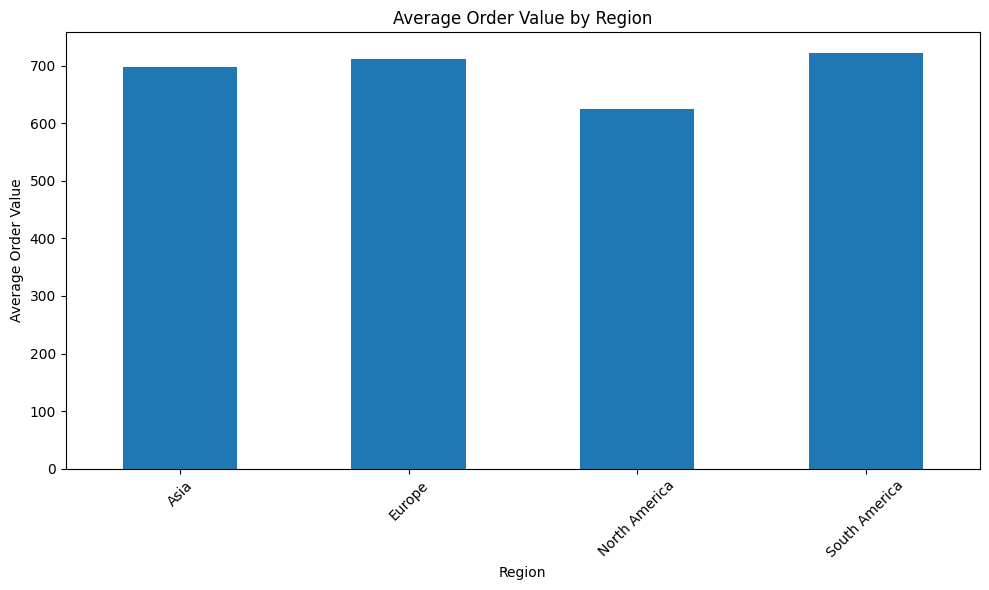

In [21]:
avg_order_by_region = pd.merge(transactions_df, customers_df, on='CustomerID')
avg_order_by_region = avg_order_by_region.groupby('Region')['TotalValue'].mean().round(2)
plt.figure(figsize=(10, 6))
avg_order_by_region.plot(kind='bar')
plt.title('Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print Key Insights

In [22]:

print("\nKey Business Insights:")
print("\n1. Category Performance:")
print(category_sales)

print("\n2. Regional Distribution:")
print(customers_df['Region'].value_counts(normalize=True).round(3) * 100)

print("\n3. Top 5 Products by Sales:")
print(top_products.head())

print("\n4. Average Order Value by Region:")
print(avg_order_by_region)

print("\n5. Customer Acquisition Trend:")
monthly_signups = customers_df.groupby(customers_df['SignupDate'].dt.strftime('%Y-%m')).size()
print(monthly_signups)


Key Business Insights:

1. Category Performance:
             Quantity  TotalValue
Category                         
Books             681   192147.47
Clothing          590   166170.66
Electronics       627   180783.50
Home Decor        639   150893.93

2. Regional Distribution:
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64

3. Top 5 Products by Sales:
ProductName            Category   
ActiveWear Smartwatch  Electronics    39096.97
SoundWave Headphones   Electronics    25211.64
SoundWave Novel        Books          24507.90
ActiveWear Jacket      Clothing       22712.56
ActiveWear Rug         Home Decor     22314.43
Name: TotalValue, dtype: float64

4. Average Order Value by Region:
Region
Asia             697.59
Europe           710.49
North America    624.24
South America    721.55
Name: TotalValue, dtype: float64

5. Customer Acquisition Trend:
SignupDate
2022-01     1
2022-02     7
2022-03     8
202